In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

In [2]:
df = pd.read_csv("Customers.csv", parse_dates=["BirthDate"], dayfirst= True)
df.head()

,CustomerKey,Prefix,FirstName,LastName,Unnamed: 4,Unnamed: 5,Unnamed: 6,BirthDate,Unnamed: 8,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Unnamed: 17,Unnamed: 18,BirthDate.1
0,11000,MR.,JON,YANG,MR. JON YANG,YANG,YANG,1966-08-04,NaN,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y,NaN,NaN,14-05-1965
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,HUANG,HUANG,1965-05-14,NaN,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N,NaN,NaN,15-02-1968
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,TORRES,TORRES,1965-12-08,NaN,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y,NaN,NaN,NaN
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,ZHU,ZHU,1968-02-15,NaN,S,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N,NaN,NaN,NaN
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,JOHNSON,JOHNSON,1968-08-08,NaN,S,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     18148 non-null  int64         
 1   Prefix          18018 non-null  object        
 2   FirstName       18148 non-null  object        
 3   LastName        18148 non-null  object        
 4   Unnamed: 4      18148 non-null  object        
 5   Unnamed: 5      18148 non-null  object        
 6   Unnamed: 6      46 non-null     object        
 7   BirthDate       18148 non-null  datetime64[ns]
 8   Unnamed: 8      0 non-null      float64       
 9   MaritalStatus   18148 non-null  object        
 10  Gender          18018 non-null  object        
 11  EmailAddress    18148 non-null  object        
 12  AnnualIncome    18148 non-null  object        
 13  TotalChildren   18148 non-null  int64         
 14  EducationLevel  18148 non-null  object        
 15  Oc

In [4]:
# Drop columns with 100% null values and other insignificant columns
df = df.drop(columns = ["Unnamed: 8", "Unnamed: 17", "Unnamed: 18", "BirthDate.1", "Unnamed: 5", "Unnamed: 6"])

In [5]:
# Rename some columns 
df.rename(columns = {"Unnamed: 4": "FullName"}, inplace = True)

In [6]:
df.head()

,CustomerKey,Prefix,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,MR. JON YANG,1966-08-04,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,1965-05-14,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,1965-12-08,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,1968-02-15,S,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,1968-08-08,S,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     18148 non-null  int64         
 1   Prefix          18018 non-null  object        
 2   FirstName       18148 non-null  object        
 3   LastName        18148 non-null  object        
 4   FullName        18148 non-null  object        
 5   BirthDate       18148 non-null  datetime64[ns]
 6   MaritalStatus   18148 non-null  object        
 7   Gender          18018 non-null  object        
 8   EmailAddress    18148 non-null  object        
 9   AnnualIncome    18148 non-null  object        
 10  TotalChildren   18148 non-null  int64         
 11  EducationLevel  18148 non-null  object        
 12  Occupation      18148 non-null  object        
 13  HomeOwner       18148 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usag

__Observation__: Only `Gender` and `Prefix` have missing values.

In [8]:
(df.isnull().sum()/df.count()[0])

CustomerKey       0.000000
Prefix            0.007163
FirstName         0.000000
LastName          0.000000
FullName          0.000000
BirthDate         0.000000
MaritalStatus     0.000000
Gender            0.007163
EmailAddress      0.000000
AnnualIncome      0.000000
TotalChildren     0.000000
EducationLevel    0.000000
Occupation        0.000000
HomeOwner         0.000000
dtype: float64

In [9]:
# Replace `Gender` and `Prefix` with the most frequent entry per column size the missing values make up for <1%

df["Gender"] = df["Gender"].fillna(df["Gender"].value_counts().index[0])
df["Prefix"] = df["Prefix"].fillna(df["Prefix"].value_counts().index[0])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     18148 non-null  int64         
 1   Prefix          18148 non-null  object        
 2   FirstName       18148 non-null  object        
 3   LastName        18148 non-null  object        
 4   FullName        18148 non-null  object        
 5   BirthDate       18148 non-null  datetime64[ns]
 6   MaritalStatus   18148 non-null  object        
 7   Gender          18148 non-null  object        
 8   EmailAddress    18148 non-null  object        
 9   AnnualIncome    18148 non-null  object        
 10  TotalChildren   18148 non-null  int64         
 11  EducationLevel  18148 non-null  object        
 12  Occupation      18148 non-null  object        
 13  HomeOwner       18148 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usag

In [11]:
# Convert `TotalChildren` and `AnnualIncome` to integers

df.TotalChildren = df.TotalChildren.astype("int")

df.AnnualIncome = df.AnnualIncome.apply(lambda x : re.sub(r"[$,]", "", x))
df.AnnualIncome = df.AnnualIncome.astype("int")

In [12]:
# Generate `age` column
today = pd.Timestamp("today")

df["Age"] = ((today - df["BirthDate"])/pd.Timedelta(days=365.25)).round().astype("int")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     18148 non-null  int64         
 1   Prefix          18148 non-null  object        
 2   FirstName       18148 non-null  object        
 3   LastName        18148 non-null  object        
 4   FullName        18148 non-null  object        
 5   BirthDate       18148 non-null  datetime64[ns]
 6   MaritalStatus   18148 non-null  object        
 7   Gender          18148 non-null  object        
 8   EmailAddress    18148 non-null  object        
 9   AnnualIncome    18148 non-null  int32         
 10  TotalChildren   18148 non-null  int32         
 11  EducationLevel  18148 non-null  object        
 12  Occupation      18148 non-null  object        
 13  HomeOwner       18148 non-null  object        
 14  Age             18148 non-null  int32         
dtypes:

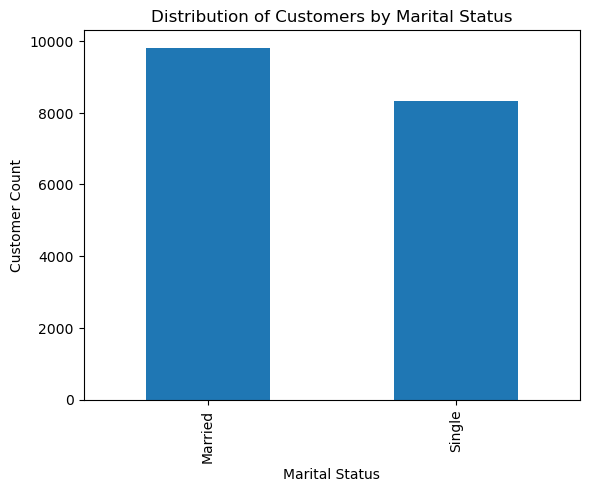

In [14]:
df.MaritalStatus.value_counts().plot(kind = "bar")
plt.xticks([0,1], ["Married", "Single"])

plt.xlabel("Marital Status")
plt.ylabel("Customer Count")
plt.title("Distribution of Customers by Marital Status");

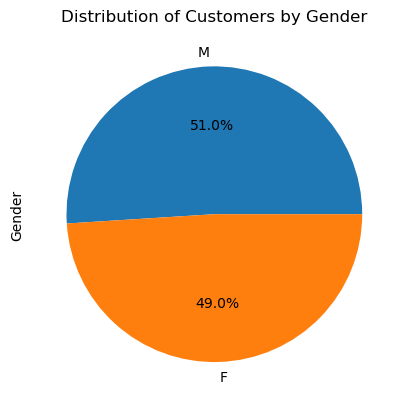

In [15]:
df.Gender.value_counts().plot(kind = "pie", autopct="%1.1f%%", normalize=True)

plt.title("Distribution of Customers by Gender");

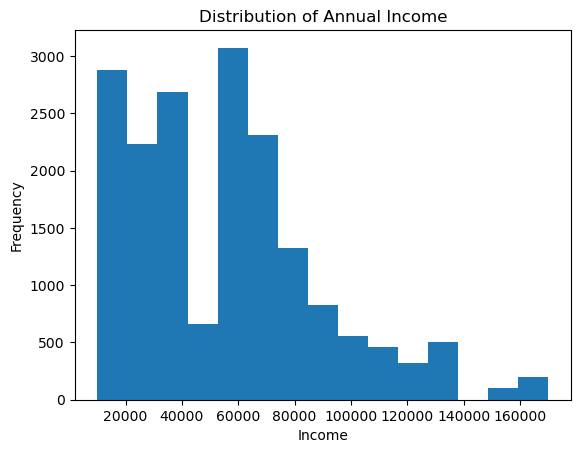

In [16]:
df.AnnualIncome.plot(kind = "hist", bins = 15);

plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Income");

In [17]:
df.columns

Index(['CustomerKey', 'Prefix', 'FirstName', 'LastName', 'FullName',
       'BirthDate', 'MaritalStatus', 'Gender', 'EmailAddress', 'AnnualIncome',
       'TotalChildren', 'EducationLevel', 'Occupation', 'HomeOwner', 'Age'],
      dtype='object')

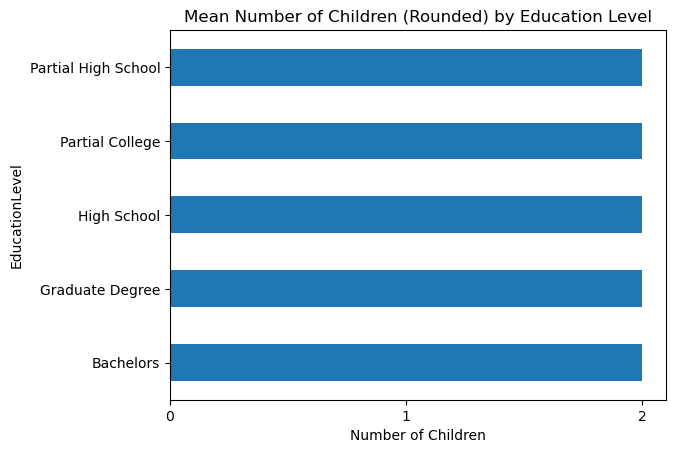

In [18]:
df.groupby("EducationLevel")["TotalChildren"].mean().round().plot(kind = "barh");

plt.xticks([0,1,2])
plt.xlabel("Number of Children")
plt.title("Mean Number of Children (Rounded) by Education Level");

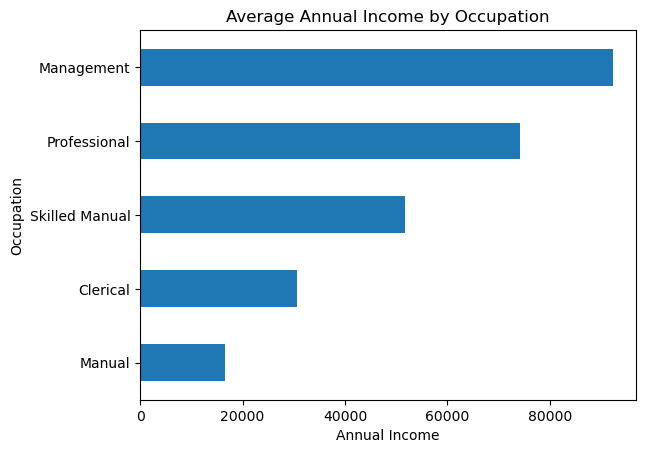

In [19]:
df.groupby("Occupation")["AnnualIncome"].mean().round(2).sort_values().plot(kind = "barh")

plt.xlabel("Annual Income")
plt.title("Average Annual Income by Occupation");

In [20]:
df["Occupation"].value_counts().index

Index(['Professional', 'Skilled Manual', 'Management', 'Clerical', 'Manual'], dtype='object')

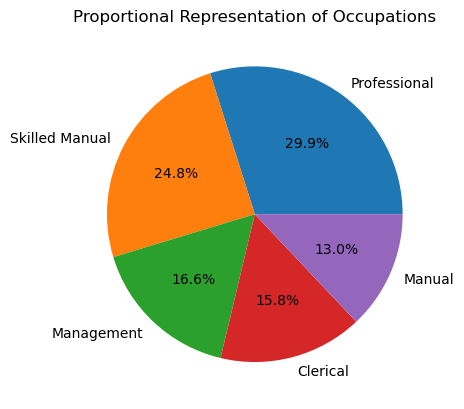

In [21]:
df["Occupation"].value_counts().plot(kind = "pie", autopct="%1.1f%%", normalize=True)

plt.ylabel("")
plt.title("Proportional Representation of Occupations");

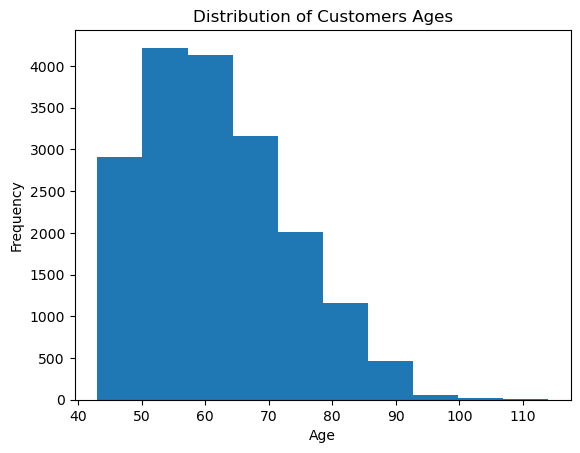

In [22]:
df.Age.plot(kind = "hist")

plt.xlabel("Age")
plt.title("Distribution of Customers Ages");

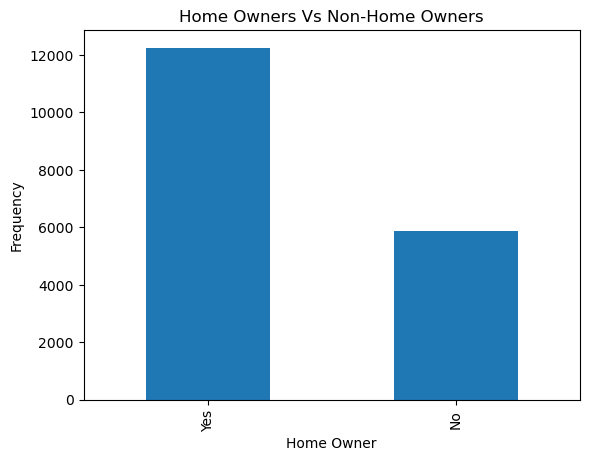

In [23]:
df.HomeOwner.value_counts().plot(kind = "bar");

plt.xticks([0,1], ["Yes","No"])

plt.xlabel("Home Owner")
plt.ylabel("Frequency")
plt.title("Home Owners Vs Non-Home Owners");

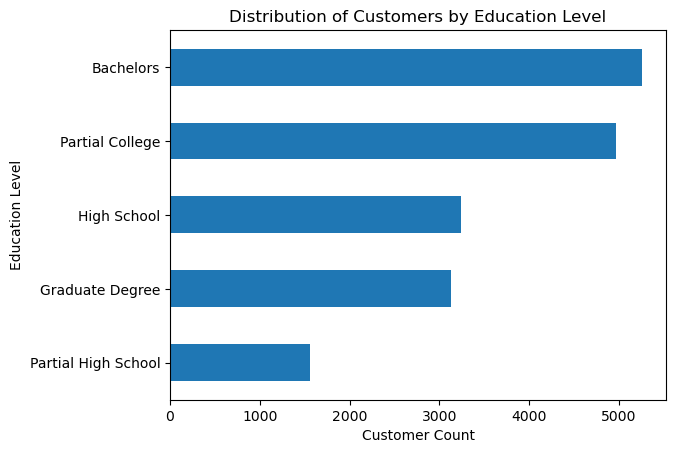

In [24]:
df.groupby("EducationLevel").size().sort_values().plot(kind = "barh");

plt.xlabel("Customer Count")
plt.ylabel("Education Level")
plt.title("Distribution of Customers by Education Level");

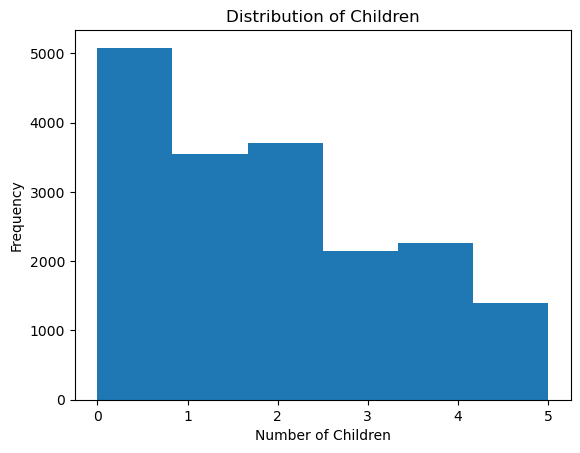

In [25]:
df.TotalChildren.plot(kind = "hist", bins = 6);

plt.xlabel("Number of Children")
plt.title("Distribution of Children");

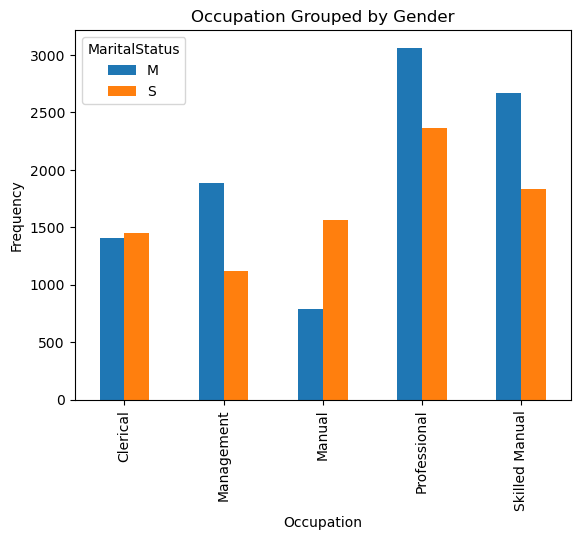

In [26]:
df.groupby(["Occupation", "MaritalStatus"])["MaritalStatus"].count().unstack().plot(kind = "bar")

plt.xlabel("Occupation")
plt.ylabel("Frequency")
plt.title("Occupation Grouped by Gender");

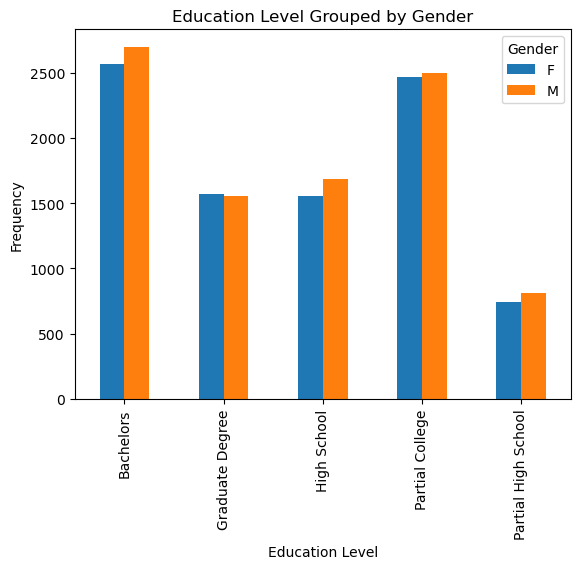

In [27]:
df.groupby(["EducationLevel", "Gender"])["Gender"].count().unstack().plot(kind = "bar")

plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.title("Education Level Grouped by Gender");

In [28]:
df.columns

Index(['CustomerKey', 'Prefix', 'FirstName', 'LastName', 'FullName',
       'BirthDate', 'MaritalStatus', 'Gender', 'EmailAddress', 'AnnualIncome',
       'TotalChildren', 'EducationLevel', 'Occupation', 'HomeOwner', 'Age'],
      dtype='object')

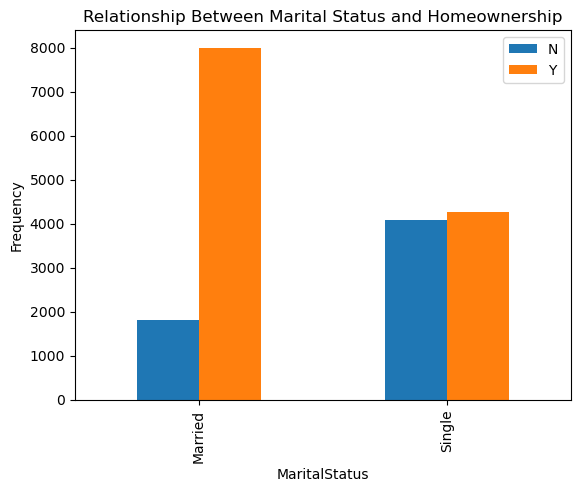

In [29]:
df.groupby(["MaritalStatus", "HomeOwner"])["HomeOwner"].count().unstack().plot(kind = "bar", label = ["No", "Yes"])

plt.xticks([0,1], ["Married", "Single"])
plt.ylabel("Frequency")
plt.title("Relationship Between Marital Status and Homeownership")

plt.legend();

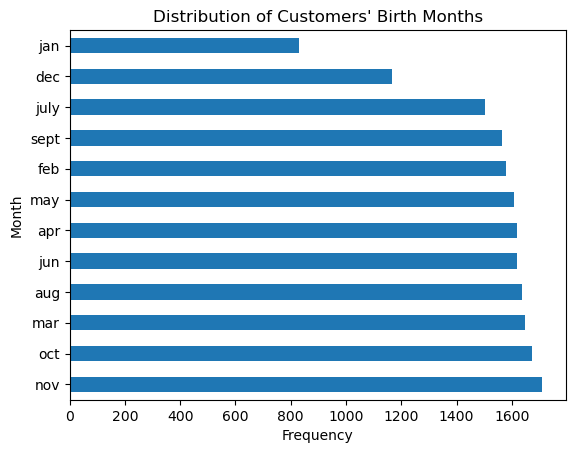

In [30]:
df.BirthDate.dt.month.map(
    {1:"jan", 2:"feb", 3:"mar", 4:"apr",5:"may", 6:"jun", 7:"july", 8:"aug", 9:"sept", 10:"oct", 11: "nov", 12:"dec"}
).value_counts().plot(kind = "barh")

plt.xlabel("Frequency")
plt.ylabel("Month")
plt.title("Distribution of Customers' Birth Months");


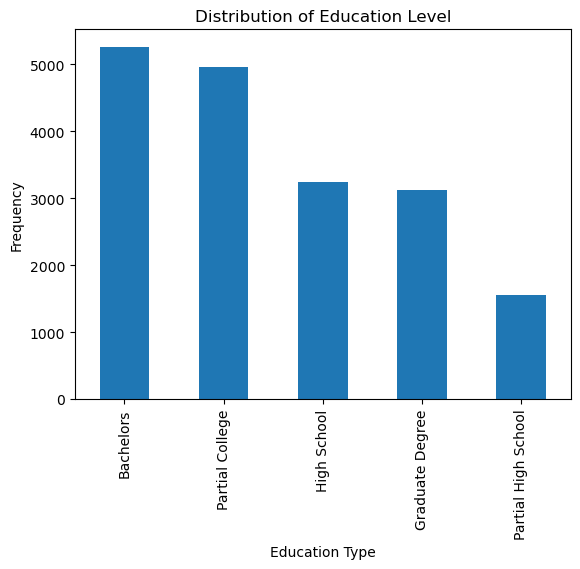

In [31]:
df.EducationLevel.value_counts().plot(kind = "bar")

plt.xlabel("Education Type")
plt.ylabel("Frequency")
plt.title("Distribution of Education Level");